# Confussion Matrices
Code largely sourced from [https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb), [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), and [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# From Raw Data

## Get Some Results
In this case I've created example predictions and ground truth data.
The data is a binary classification {0,1}

In [2]:
Y_groundtruth = [1, 0, 0, 0, 1, 0, 0, 1]
Y_predicted   = [0, 1, 1, 0, 1, 0, 0, 1]

## Calculate A Confusion Matrix

In [3]:
cm = confusion_matrix(y_true=Y_groundtruth,
                      y_pred=Y_predicted)

cm

array([[3, 2],
       [1, 2]], dtype=int64)

From the above results we see that when we predicted 0 correctly, 3 times (encoded as row 0 and column 0).
We predicted 0 when the actual answer was 1, 2 times (encoded as row 0 and column 1).
We predicted 1 when the actual answer was 0, 1 time (encoded as row 1 and column 0).
And we correctly predicted 1, twice (encoded as row 1 and column 1).
From this we see that the diagonal represents the cases where we predicted correctly, and off-diagonal cells are cases we predicted incorrectly.

## Plot
NOTE: There are many more useful parameters for ConfusionMatrixDisplay such as `labels`, `normalize`, `cmap`, `ax`, etc. which can be found at [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

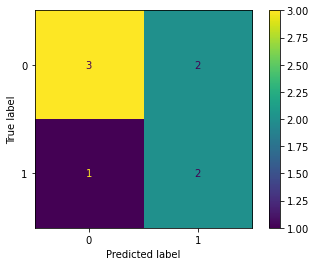

In [4]:
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

# From An Estimator Or Estimator Results

## Construct An "Estimator" And Fit It To Some Data

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Simulate A "Round Up" Function To Learn (Using Way Too Little Data)

X_train = [[1], [1.75], [2], [3.25], [4], [5]] # scikit-learn estimator expect 2D input data
Y_train = [ 1,   2,      2,   3,      4,   5]

X_test = [[1.5], [2], [3.5], [4], [5.5]]
Y_test = [ 2,     2,   4,     4,   5]

estimator = DecisionTreeClassifier()
estimator.fit(X=X_train,
              y=Y_train)

DecisionTreeClassifier()

## Plot Using The Estimator And Test Data
NOTE: There are many more useful parameters for `ConfusionMatrixDisplay.from_estimator` such as `labels`, `normalize`, `cmap`, `ax`, etc. which can be found at [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

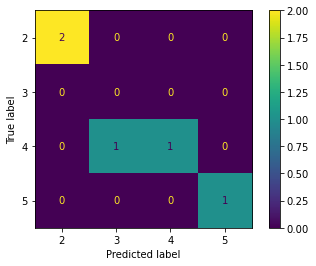

In [6]:
ConfusionMatrixDisplay.from_estimator(estimator, X_test, Y_test)
plt.show()

## Plot From Test And Prediction Data
NOTE: There are many more useful parameters for `ConfusionMatrixDisplay.from_predictions` such as `labels`, `normalize`, `cmap`, `ax`, etc. which can be found at [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

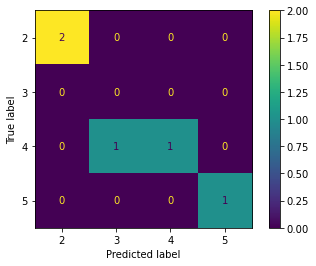

In [7]:
Y_predictions = estimator.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_true=Y_test,
                                        y_pred=Y_predictions)
plt.show()